# EDA To Prediction (DieTanic)


## Inhalt des Notizbuchs:

#### Teil1: Explorative Datenanalyse (EDA):
1) Analyse der Merkmale.

2) Auffinden von Beziehungen oder Trends unter Berücksichtigung mehrerer Merkmale.
#### Teil2: Feature Engineering und Datenbereinigung:
1) Hinzufügen einiger weniger Merkmale.

2) Entfernen von redundanten Merkmalen.

3) Umwandlung der Merkmale in eine für die Modellierung geeignete Form.
#### Teil3: Prädiktive Analysemodelle
1) Ausführen grundlegender Algorithmen.

2) Kreuzvalidierung.

3) Extraktion wichtiger Merkmale.


## **Part1: Exploratory Data Analysis (EDA)**

In [65]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [66]:
#import datasets
df_train = pd.read_csv(r'C:\Users\fis38514\Documents\OTH\rAIse\Green Belt\titanic\train.csv') #eigenen Pfad benutzen
df_test = pd.read_csv(r'C:\Users\fis38514\Documents\OTH\rAIse\Green Belt\titanic\test.csv')
y_test = pd.read_csv(r'C:\Users\fis38514\Documents\OTH\rAIse\Green Belt\titanic\gender_submission.csv')

#Kombination von der Datensets zu einem großen Datensatz
df_test_all = pd.merge(df_test, y_test)
data = pd.concat([df_train, df_test_all], axis=0, ignore_index=True)

In [67]:
#Inspizierung der ersten 5 Einträge und der Merkmale
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [68]:
#Inspzizierung der einzelnen Datentypen und Anzahl der Nulleinträge sowie Einträge insgesamt
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


### **Übersicht Merkmale** 
* `PassengerId` is the unique id of the row and it doesn't have any effect on target
* `Survived` is the target variable we are trying to predict (**0** or **1**):
    - **1 = Survived**
    - **0 = Not Survived**
* `Pclass` (Passenger Class) is the socio-economic status of the passenger and it is a categorical ordinal feature which has **3** unique values (**1**,  **2 **or **3**):
    - **1 = Upper Class**
    - **2 = Middle Class**
    - **3 = Lower Class**
* `Name`, `Sex` and `Age` are self-explanatory
* `SibSp` is the total number of the passengers' siblings and spouse
* `Parch` is the total number of the passengers' parents and children
* `Ticket` is the ticket number of the passenger
* `Fare` is the passenger fare
* `Cabin` is the cabin number of the passenger
* `Embarked` is port of embarkation and it is a categorical feature which has **3** unique values (**C**, **Q** or **S**):
    - **C = Cherbourg**
    - **Q = Queenstown**
    - **S = Southampton**

In [69]:
data.isnull().sum() #Nulleinträge nach Merkmal

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

_________________________________________________________________________________________________

**Erkenntnis:** Die Felder **Age, Fare, Cabin and Embarked** haben Nullwerte. 

__________________________________________________________________________________________________

### Überlebende

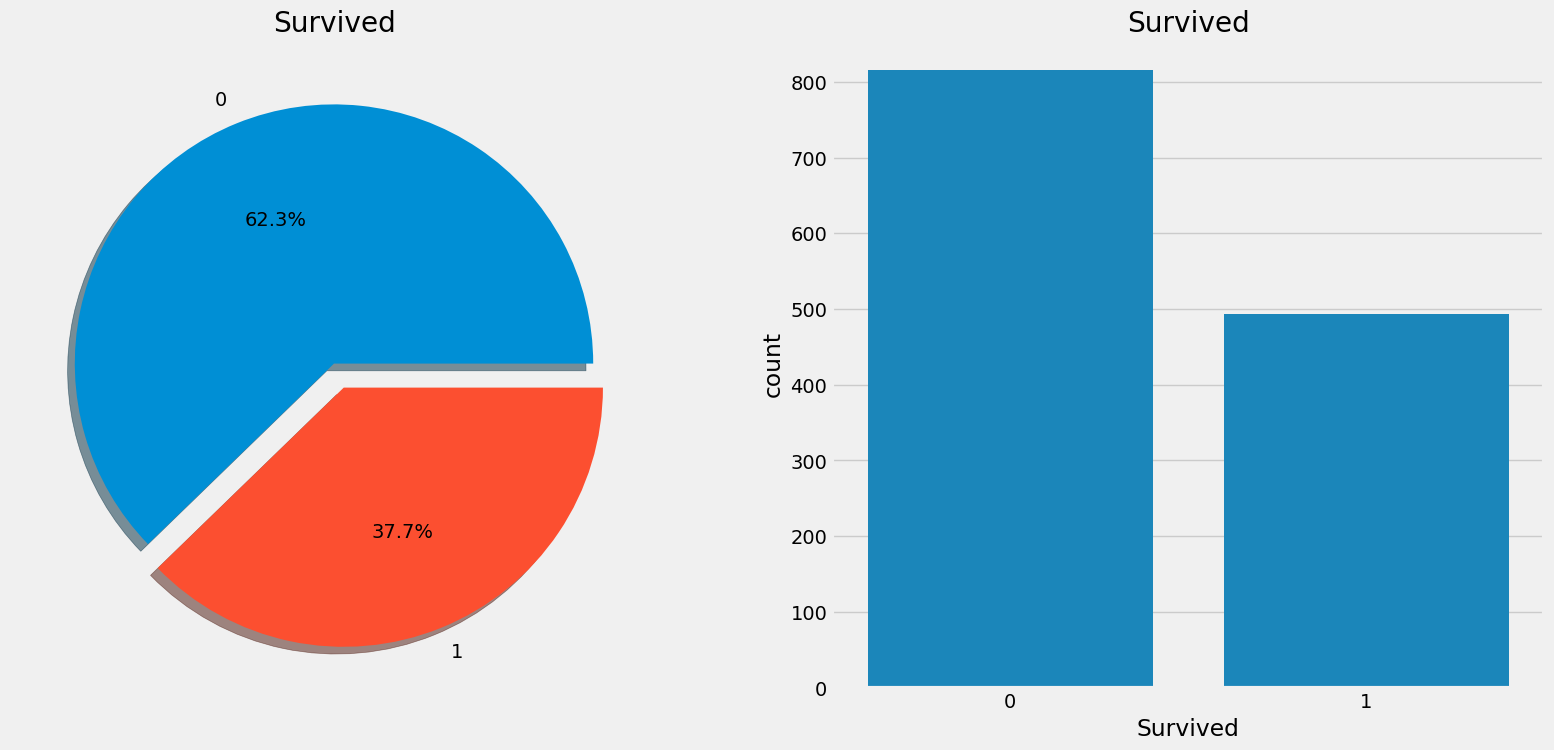

In [70]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot(x='Survived',data=data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()



_________________________________________________________________________________________________

Es ist offensichtlich, dass nicht viele Passagiere den Unfall überlebten. 

Von den 1309 Passagieren im Trainingssatz überlebten nur etwa 500, d. h. nur **37,7 %** des gesamten Trainingssatzes überlebten den Unfall. Wir müssen noch tiefer in die Daten eindringen, um zu sehen, welche Kategorien von Passagieren überlebt haben und welche nicht.

Wir werden versuchen, die Überlebensrate mit Hilfe der verschiedenen Merkmale des Datensatzes zu überprüfen. Einige der Merkmale sind Geschlecht, Ankunftshafen, Alter, usw.

__________________________________________________________________________________________________

### **Arten von Merkmalen**

### Kategorische Merkmale:
Eine kategoriale Variable besteht aus zwei oder mehr Kategorien, denen jeder Wert des Merkmals zugeordnet werden kann, z. B. ist das Geschlecht eine kategoriale Variable mit zwei Kategorien (männlich und weiblich). Wir können solche Variablen nicht sortieren oder ihnen eine Reihenfolge zuweisen. Sie werden auch als **Nominalvariablen** bezeichnet.

**Kategoriale Merkmale im Datensatz: Geschlecht, Embarked**.

### Ordinale Merkmale:
Eine Ordinalvariable ähnelt den kategorialen Werten, aber der Unterschied zwischen ihnen besteht darin, dass wir eine relative Ordnung oder Sortierung zwischen den Werten haben können. Zum Beispiel: Wenn wir ein Merkmal wie **Höhe** mit den Werten **groß, mittelgroß, klein** haben, dann ist die Höhe eine ordinale Variable. Hier können wir eine relative Sortierung in der Variable vornehmen.

**Ordinale Merkmale im Datensatz: PClass**

### Kontinuierliches Merkmal:
Ein Merkmal wird als kontinuierlich bezeichnet, wenn es Werte zwischen zwei beliebigen Punkten oder zwischen den Mindest- und Höchstwerten in der Merkmalsspalte annehmen kann.

**Kontinuierliche Merkmale im Datensatz: Alter**

## **Analyse der Merkmale**

## Sex (Categorical Feature)

In [71]:
#Gruppierung von Datenframes mit groupby (mehr dazu: Pandas Dokumentation)
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           385
male    0           734
        1           109
Name: Survived, dtype: int64

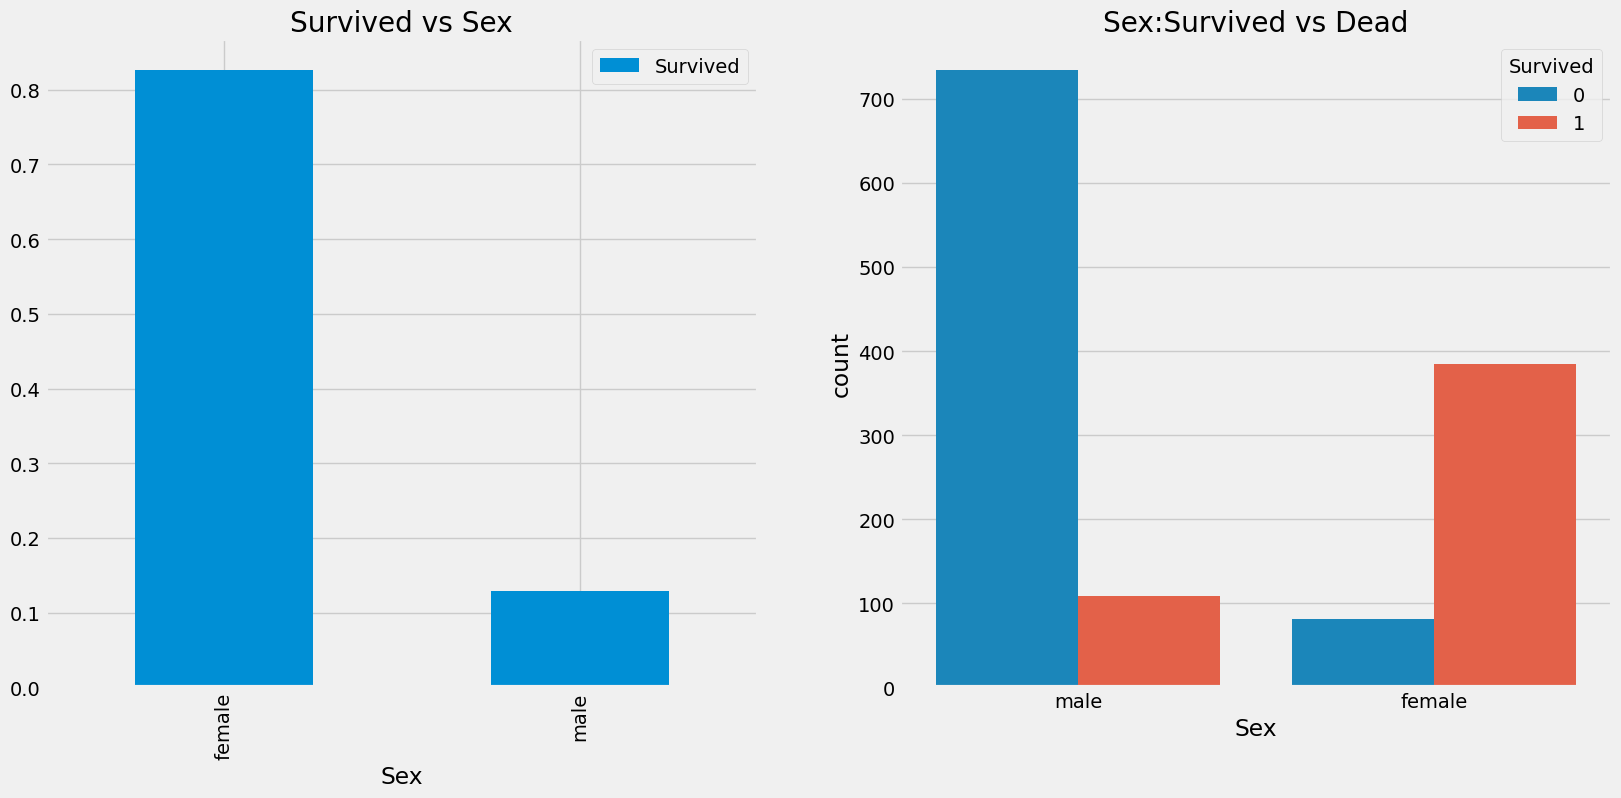

In [72]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0]) #man kann groupby Befehle auch direkt plotten
ax[0].set_title('Survived vs Sex')
sns.countplot(x='Sex',hue='Survived',data=data,ax=ax[1]) #Dokumentation beachten! 
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

- Die Zahl der Männer auf dem Schiff ist viel höher als die Zahl der Frauen. Dennoch ist die Zahl der geretteten Frauen sehr viel höher (mehr als 3 mal so hoch) wie die Zahl der geretteten Männer. Die Überlebensrate der **Frauen auf dem Schiff liegt bei etwa 82 %, die der Männer bei etwa 12 %**.

- Dies scheint ein **sehr wichtiges** Merkmal für die Modellierung zu sein. Aber ist es auch das beste?   Sehen wir uns andere Merkmale an.

## Pclass (**Ordinal Feature**)

In [73]:
pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,137,186,323
2,160,117,277
3,518,191,709
All,815,494,1309


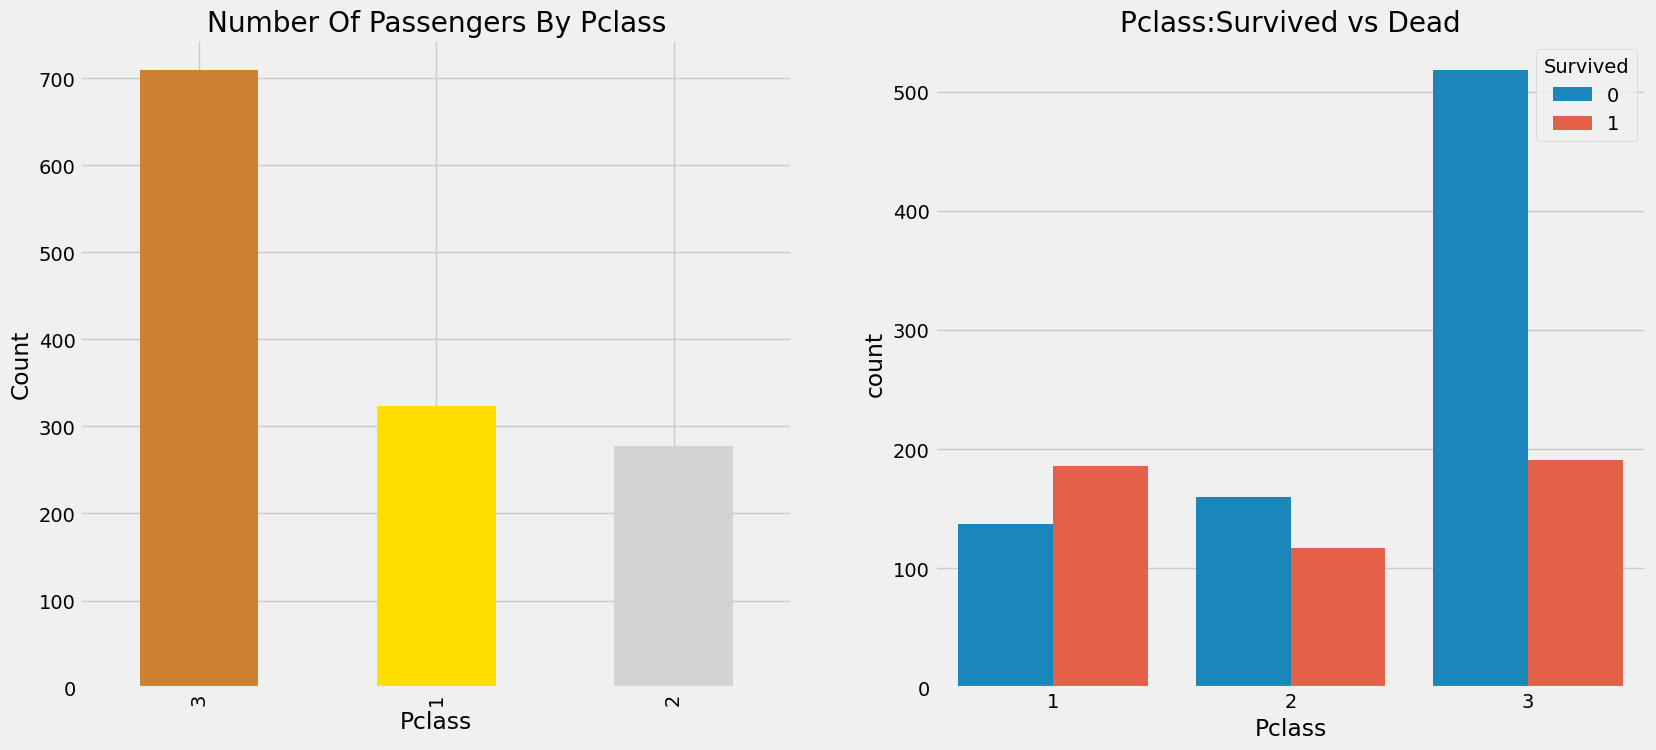

In [74]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot(x='Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

Wir können deutlich sehen, dass den Passagieren der Klasse 1 bei der Rettung eine sehr hohe Priorität eingeräumt wurde. Obwohl die Anzahl der Passagiere in Pclass 3 viel höher war, ist die Anzahl der Überlebenden sehr niedrig, etwa **30%**.

Insgesamt haben die meisten Passagiere nur ein Klasse 3 Ticket erhalten. Bei Klasse 1 und 2 sind die Überlebenschancen relativ gut.

Prüfen wir die Überlebensrate mit **Geschlecht und Pclass** zusammen.


In [75]:
#crosstab erstellt eine Tabelle nach gewünschter Konfiguration
pd.crosstab([data.Sex,data.Survived],data.Pclass,margins=True).style.background_gradient(cmap='summer_r')

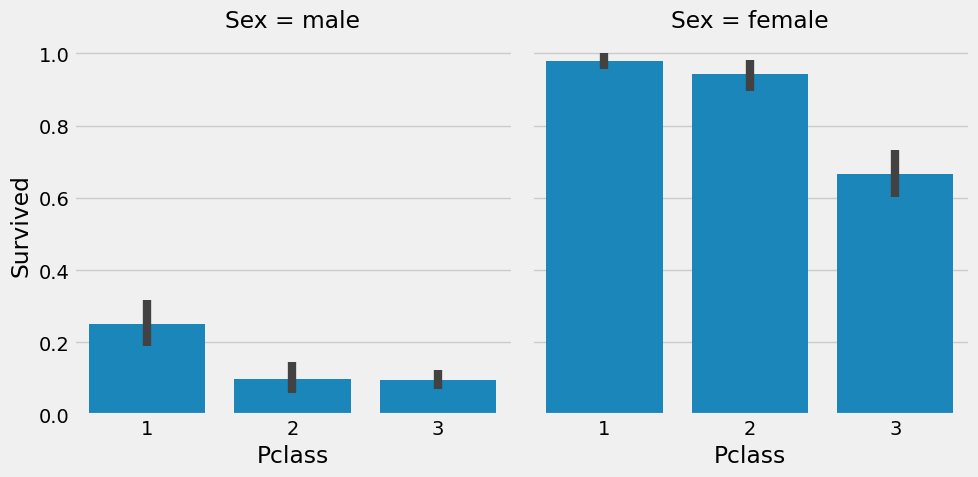

In [76]:
sns.catplot(data=data, x='Pclass',y='Survived',kind='bar', col='Sex')
plt.show()

Aus der **Kreuztabelle** und dem **Catplot** können wir leicht ableiten, dass die Überlebensrate für **Frauen der Pklasse 1** bei etwa **95-96 %** liegt, da nur 3 von 94 Frauen der Pklasse 1 starben. 

Es ist offensichtlich, dass unabhängig von der Pclass Frauen bei der Rettung erste Priorität hatten. Selbst Männer der Pklasse 1 haben eine sehr niedrige Überlebensrate.



## Age **(Continous Feature)**


In [77]:
print('Oldest Passenger was of:',data['Age'].max(),'Years')
print('Youngest Passenger was of:',data['Age'].min(),'Years')
print('Average Age on the ship:',data['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.17 Years
Average Age on the ship: 29.881137667304014 Years


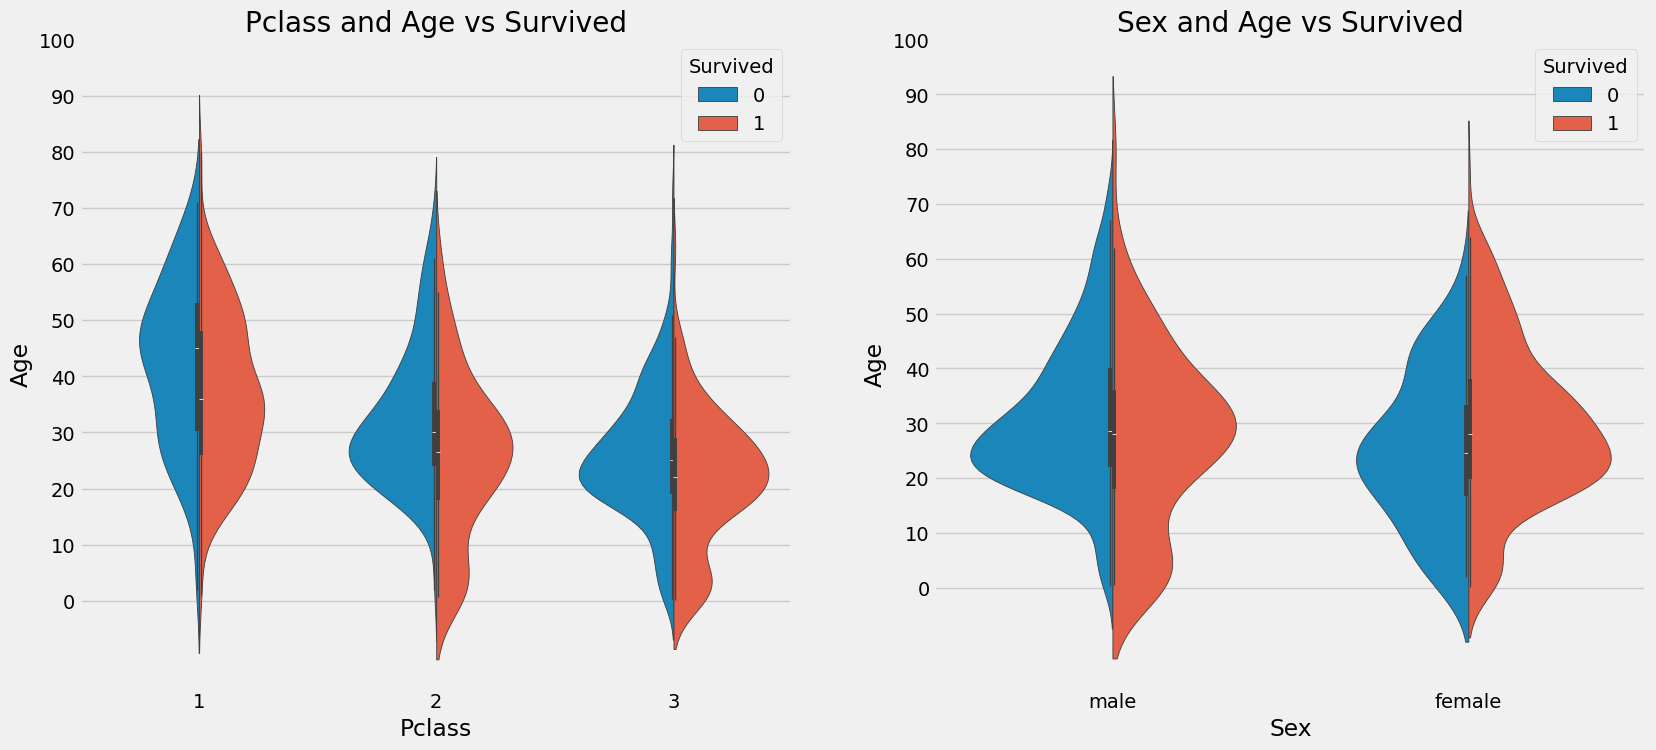

In [78]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot(x="Pclass",y="Age", hue="Survived", data=data,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot(x="Sex",y="Age", hue="Survived", data=data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

#### Beobachtungen:

1) Die Anzahl der Kinder steigt mit der Pclass und die Überlebensrate für Passeneger unter 10 Jahren (d.h. Kinder) scheint unabhängig von der Pclass gut zu sein.

2) Die Überlebenschancen für Passanten im Alter von 20-50 Jahren aus Pclass1 sind hoch und für Frauen sogar noch besser.

3) Bei Männern nimmt die Überlebenschance mit zunehmendem Alter ab.

Wie wir bereits gesehen haben, hat das Merkmal Alter **177** Nullwerte. Um diese NaN-Werte zu ersetzen, können wir ihnen das Durchschnittsalter des Datensatzes zuweisen.
Wenn wir uns das Merkmal ansehen, sehen wir, dass die Namen eine Anrede wie Herr oder Frau haben. So können wir die Mittelwerte von Herr und Frau den jeweiligen Gruppen zuordnen.

**Erstellung eines neuen Merkmales** 

In [79]:
data['Initial']=0 #Erstellen einer neuen Spalte namens Initial
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.') #Wir extrahieren alles was vor einem Punkt steht 

Okay, also hier sind wir mit der Regex: **[A-Za-z]+)\.**. Es wird also nach Zeichenfolgen gesucht, die zwischen **A-Z oder a-z** liegen, gefolgt von einem **.(Punkt)**. Wir haben also erfolgreich die Initialen aus dem Namen extrahiert.

In [80]:
pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap='summer_r') #Initialen sortiert nach Geschlecht

Initial,Capt,Col,Countess,Don,Dona,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,1,0,1,0,0,260,2,1,0,197,2,0,0
male,1,4,0,1,0,7,1,0,2,61,0,0,0,757,0,0,8,1


Okay, es gibt einige falsch geschriebene Initialen wie Mlle oder Mme, die für Miss stehen. Ich werde sie durch Miss ersetzen und dasselbe gilt für andere Werte.

In [81]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr','Mrs'],inplace=True)

In [82]:
data.groupby('Initial')['Age'].mean() #Durchschnittsalter je nach Initial

Initial
Master     5.482642
Miss      21.834533
Mr        32.545531
Mrs       37.046243
Other     44.923077
Name: Age, dtype: float64

### Filling NaN Ages

In [83]:
## Zuweisung der NaN-Werte mit den Werten der mittleren Alter
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [84]:
data.Age.isnull().any() #Also keine Nullwerte bei Alter mehr

False

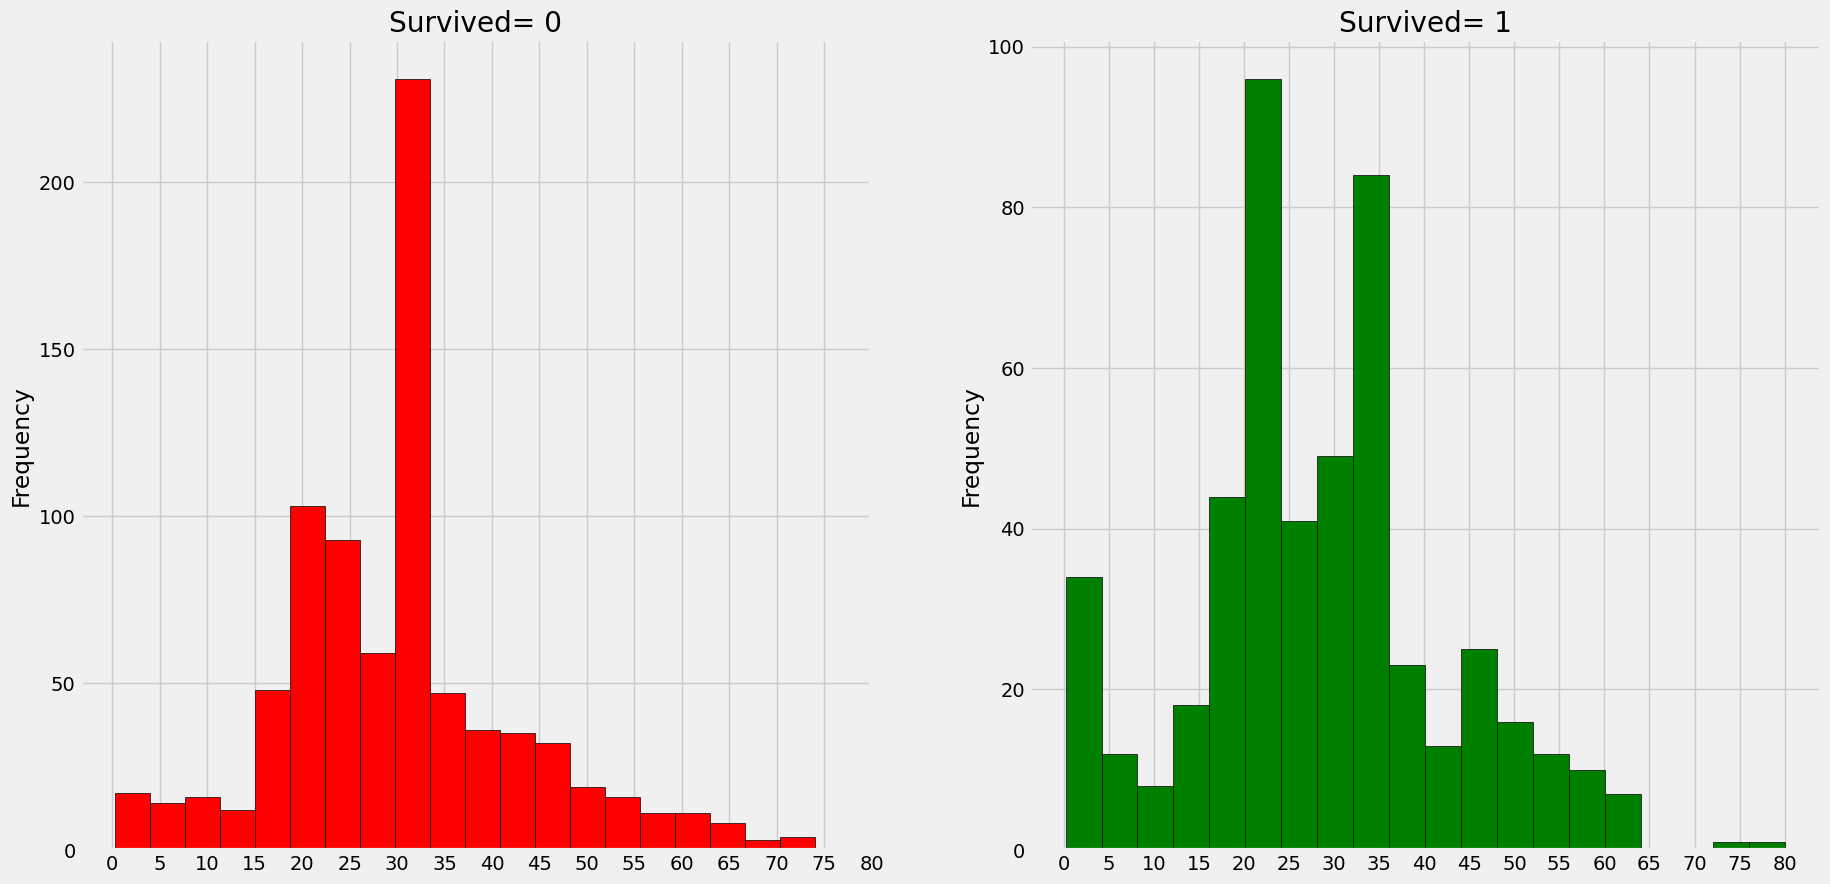

In [85]:
#Zwei Histplots: Auftrag zwischen Alter und Häufigkeit jeweils für überlebt und nicht überlebt
f,ax=plt.subplots(1,2,figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

### Beobachtungen:
1) Die Kleinkinder (Alter unter 5 Jahren) wurden in großer Zahl gerettet (die Politik "Frauen und Kinder zuerst").

2) Der älteste Passagier wurde gerettet (80 Jahre).

3) Die meisten Todesfälle gab es in der Altersgruppe von 30-40 Jahren.

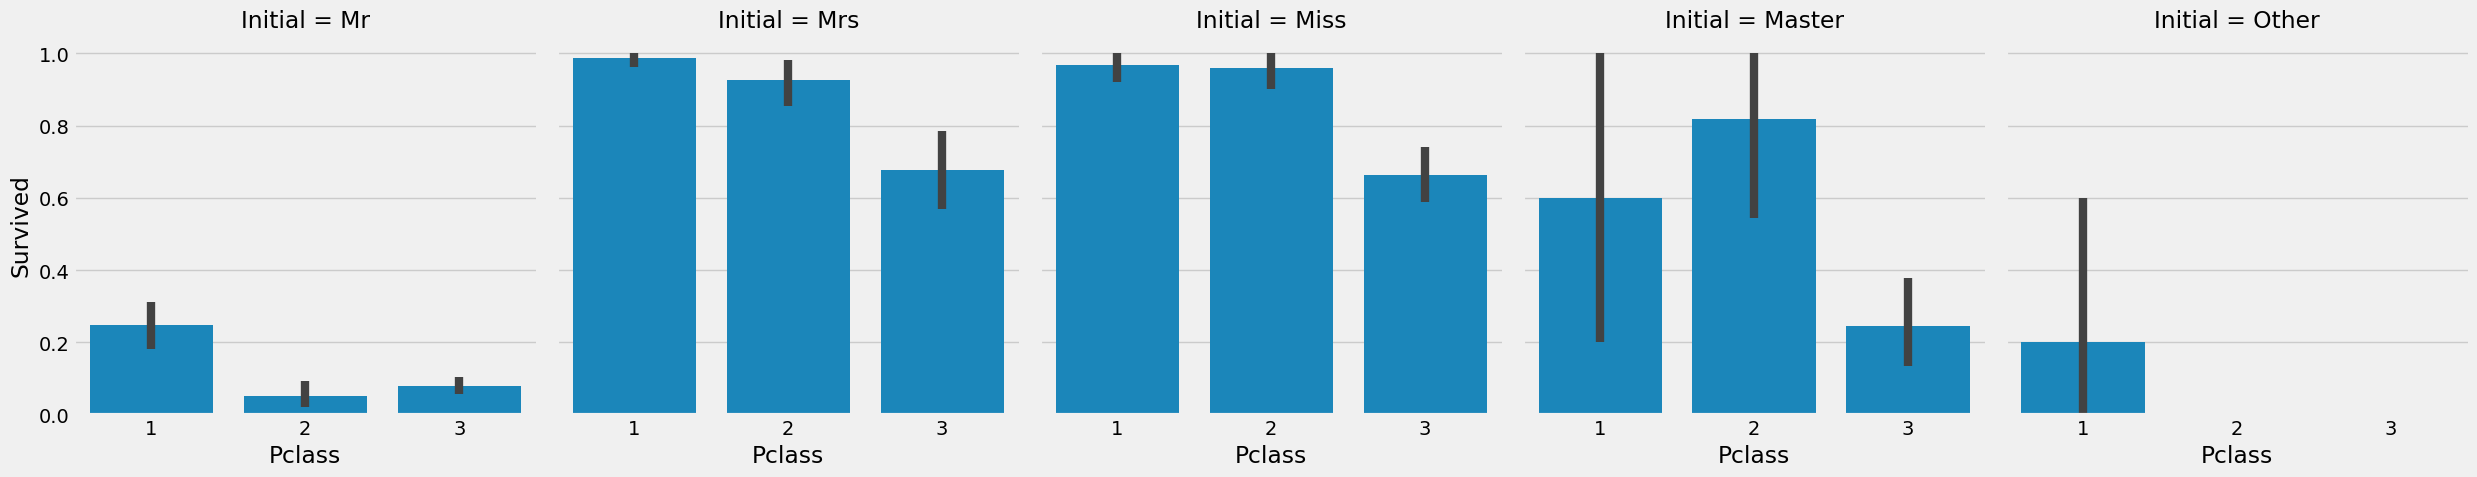

In [86]:
sns.catplot(data=data, x='Pclass',y='Survived',col='Initial', kind = 'bar')
plt.show()

Die Politik "Frauen und Kinder zuerst" gilt also unabhängig von der Klasse.

## Embarked **(Categorical Value)**

In [87]:
pd.crosstab([data.Embarked,data.Pclass],[data.Sex,data.Survived],margins=True).style.background_gradient(cmap='summer_r')

### Überlebenschancen nach Einschiffungshafen

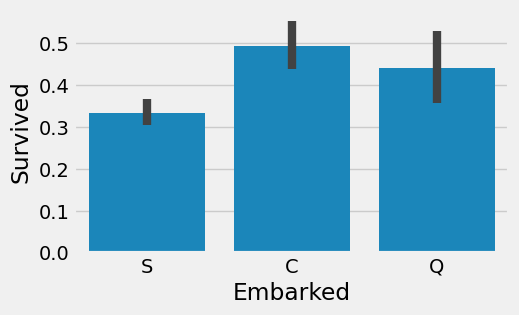

In [88]:
sns.barplot(x='Embarked',y='Survived',data=data)
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

Die Überlebenschancen für Hafen C sind mit 0,49 am höchsten, während sie für S am niedrigsten sind.

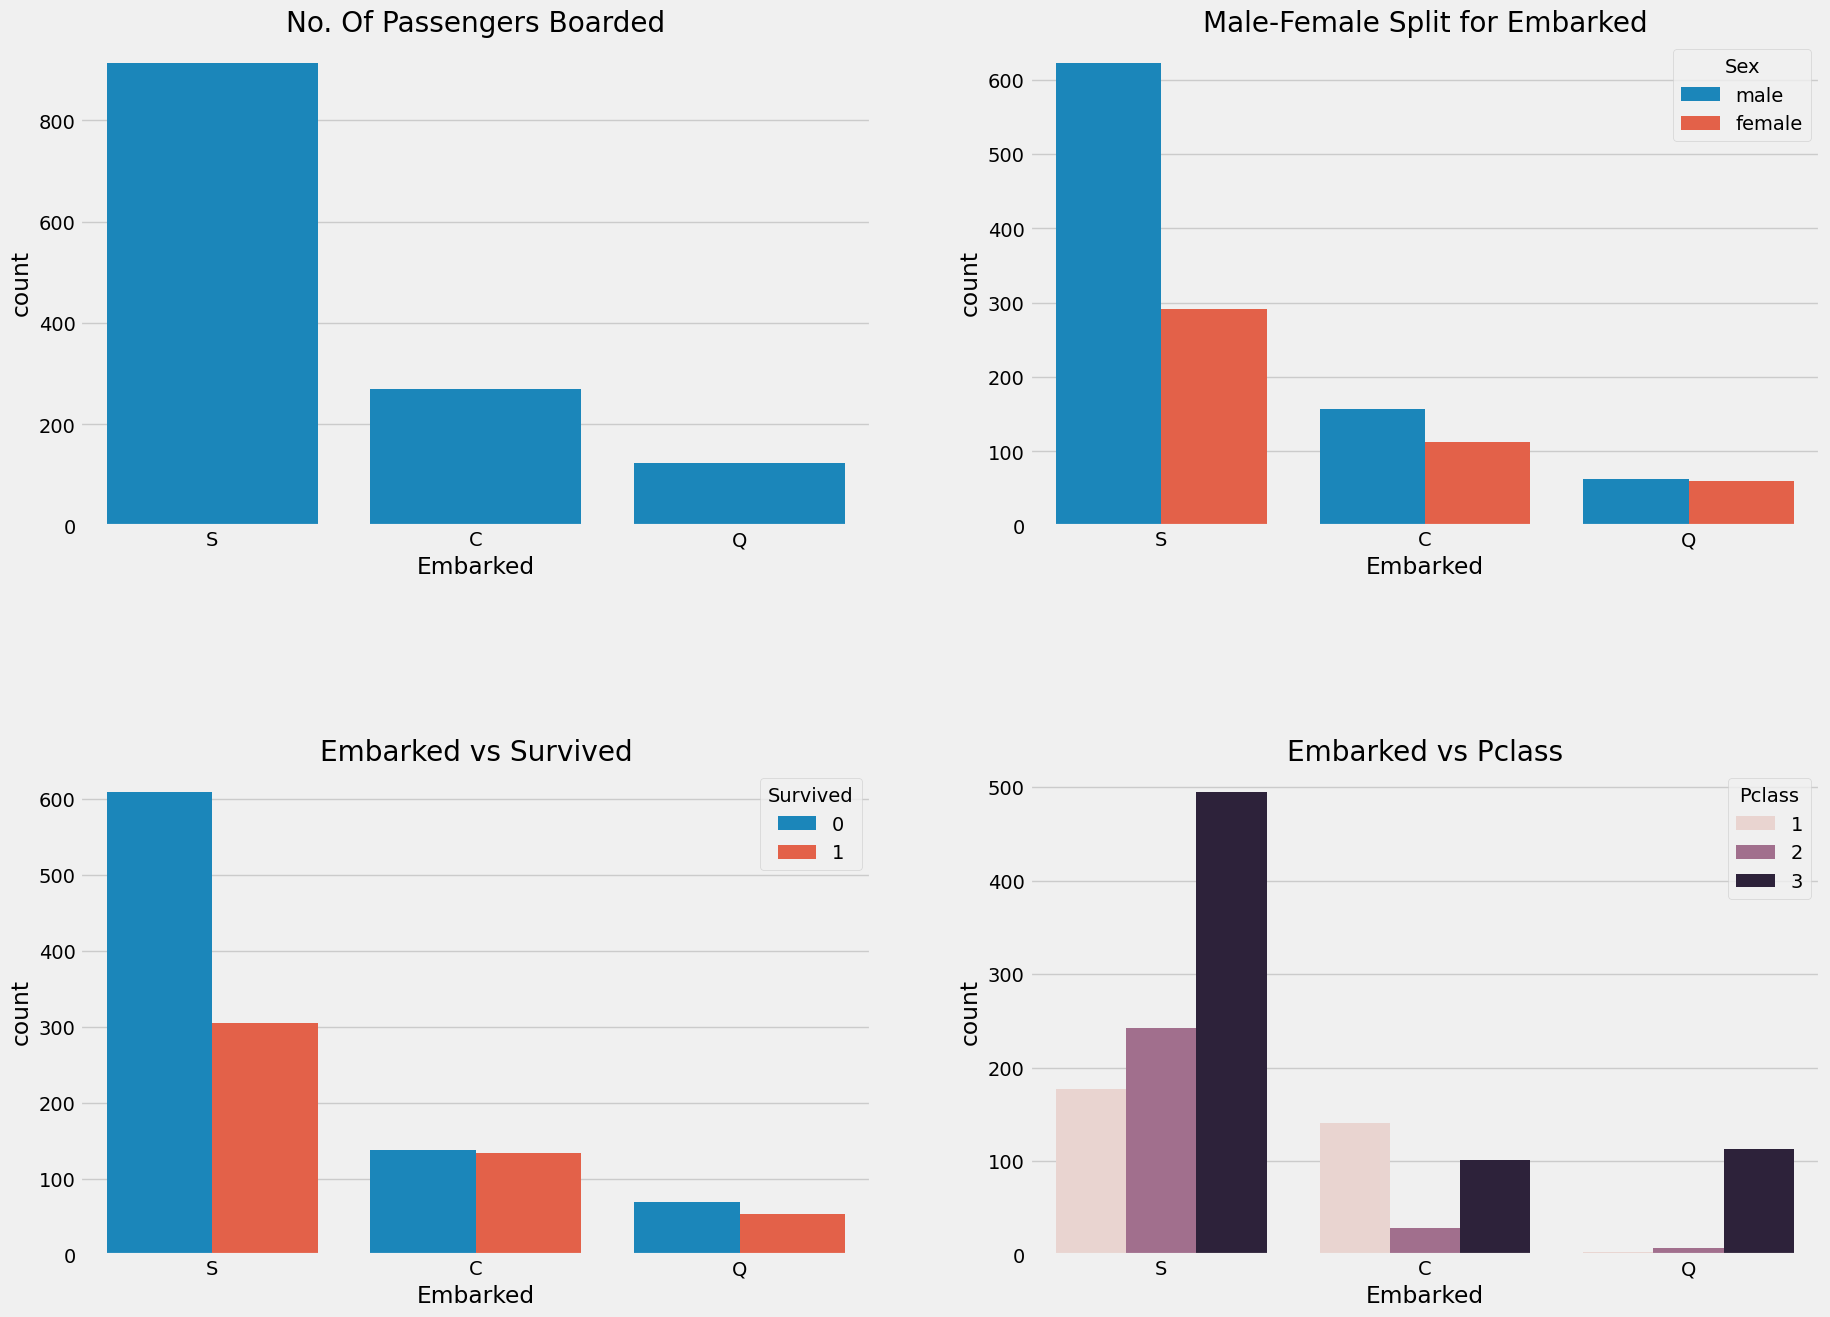

In [89]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot(x='Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot(x='Embarked',hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot(x='Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot(x='Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

### Beobachtungen:
1) Die meisten Passagiere stiegen in S ein. Die meisten von ihnen gehören zur P-Klasse 3.

2) Die Passagiere aus C scheinen Glück gehabt zu haben, da ein großer Teil von ihnen überlebte. Der Grund dafür könnte die Rettung aller Passagiere der Klassen 1 und 2 sein.

3) Die Einschiffung S sieht nach dem Hafen aus, von dem aus die meisten reichen Leute an Bord gingen. Dennoch sind die Überlebenschancen hier gering, da viele Passagiere der Pclass3 nicht überlebt haben. 

4) Hafen Q hatte extrem hohen Anteil der Passagiere aus Pclass3.

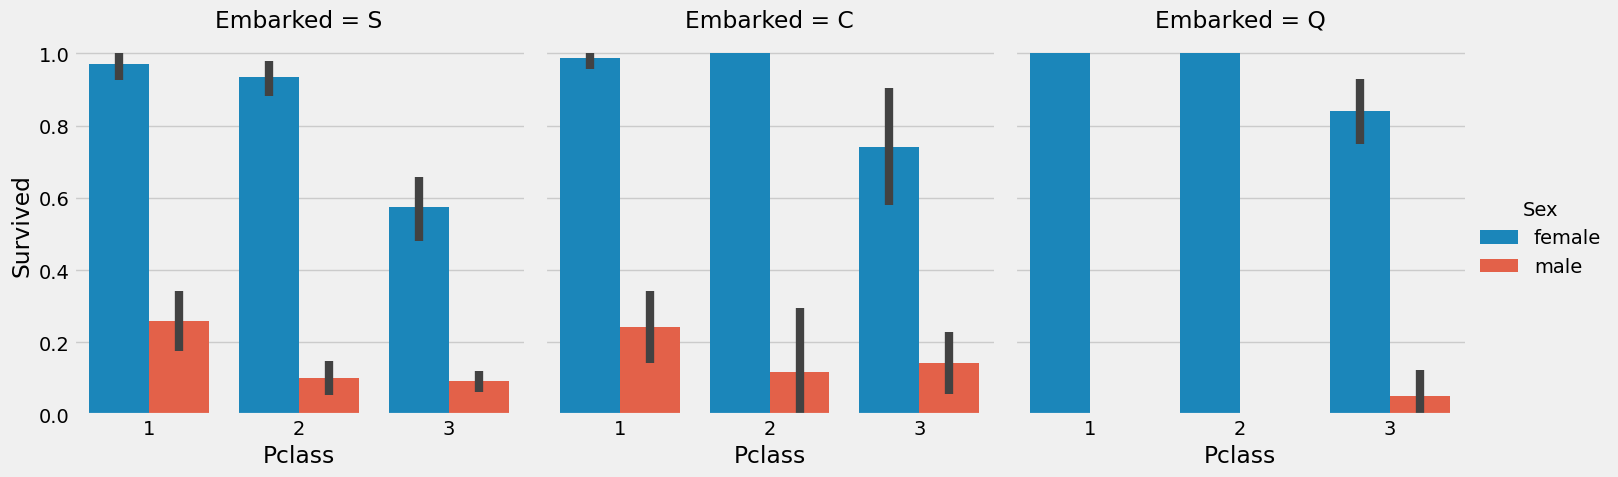

In [90]:
sns.catplot(x='Pclass',y='Survived',kind='bar',hue='Sex',col='Embarked',data=data)
plt.show()

### Beobachtungen:

1) Die Überlebenschancen von Frauen für Pclass1 und Pclass2 sind unabhängig von der Pclass fast 1.

2) Hafen S scheint für Pclass3-Passagiere sehr unglücklich zu sein, da die Überlebensrate sowohl für Männer als auch für Frauen sehr niedrig ist.

3) Hafen Q scheint für Männer am unglücklichsten zu sein, da fast alle aus Pclass 3 stammen.


### Filling Embarked NaN

Da wir gesehen haben, dass die meisten Passagiere von Hafen S aus eingestiegen sind, ersetzen wir NaN durch S.

In [91]:
data['Embarked'].fillna('S',inplace=True)

In [92]:
data.Embarked.isnull().any()# Finally No NaN values

False

## SibSip **(Diskretes Merkmal)**
Dieses Merkmal gibt an, ob eine Person allein oder mit ihren Familienmitgliedern ist.

Geschwister = Bruder, Schwester, Stiefbruder, Stiefschwester

Ehepartner = Ehemann, Ehefrau

In [93]:
pd.crosstab([data.SibSp],data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,593,298
1,153,166
2,23,19
3,15,5
4,18,4
5,5,1
8,8,1


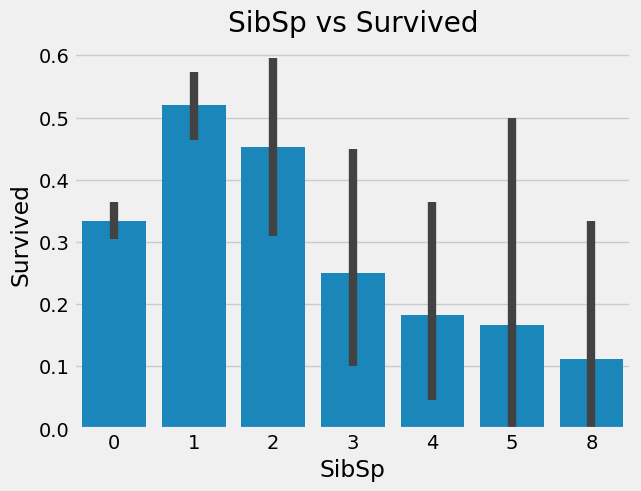

In [94]:
sns.barplot(x='SibSp',y='Survived',data=data).set(title='SibSp vs Survived')
plt.show()

In [95]:
pd.crosstab(data.SibSp,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,198,182,511
1,113,82,124
2,8,12,22
3,4,1,15
4,0,0,22
5,0,0,6
8,0,0,9


### Beobachtungen:


Das Balkendiagramm und das Faktorendiagramm zeigen, dass ein Passagier, der allein an Bord ist und keine Geschwister hat, eine Überlebensrate von 34,5 % hat. Das Diagramm nimmt grob ab, wenn die Anzahl der Geschwister steigt. Das macht Sinn. Das heißt, wenn ich eine Familie an Bord habe, werde ich versuchen, sie zu retten, anstatt zuerst mich selbst zu retten. Überraschenderweise liegt die Überlebensrate für Familien mit 5-8 Mitgliedern bei **sehr niedrig**. Der Grund dafür könnte Pclass sein?

Der Grund ist **Pklasse**. Die Kreuztabelle zeigt, dass Personen mit SibSp>3 alle in Pclass3 waren.

## Parch

In [96]:
pd.crosstab(data.Parch,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,242,206,554
1,50,43,77
2,27,25,61
3,2,3,3
4,2,0,4
5,0,0,6
6,0,0,2
9,0,0,2


The crosstab again shows that larger families were in Pclass3.

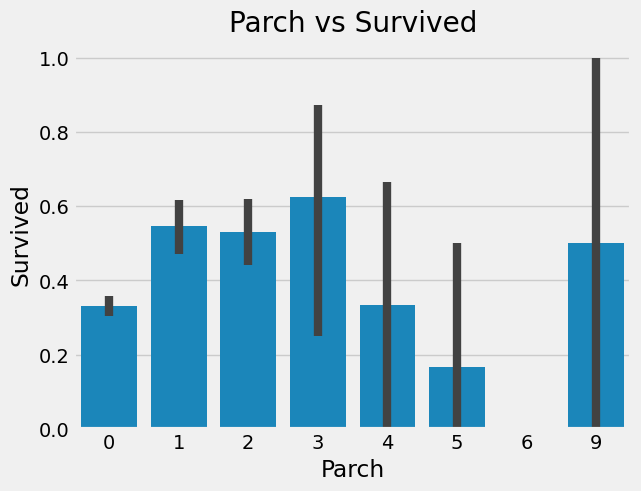

In [97]:
sns.barplot(x='Parch',y='Survived',data=data).set(title='Parch vs Survived')
plt.show()

### Beobachtungen:

Auch hier sind die Ergebnisse recht ähnlich. Passagiere, die ihre Eltern an Bord haben, haben eine höhere Überlebenschance. Sie nimmt jedoch ab, je höher die Zahl ist.

Die Überlebenschancen sind gut für jemanden, der 1-3 Eltern auf dem Schiff hat. Allein zu sein erweist sich ebenfalls als tödlich, und die Überlebenschancen nehmen ab, wenn jemand >4 Eltern auf dem Schiff hat.

## Fare **(Continous Feature)**

In [98]:
print('Highest Fare was:',data['Fare'].max())
print('Lowest Fare was:',data['Fare'].min())
print('Average Fare was:',data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 33.29547928134557


Der niedrigste Tarif ist **0,0**. Wow!! eine kostenlose Luxusfahrt.

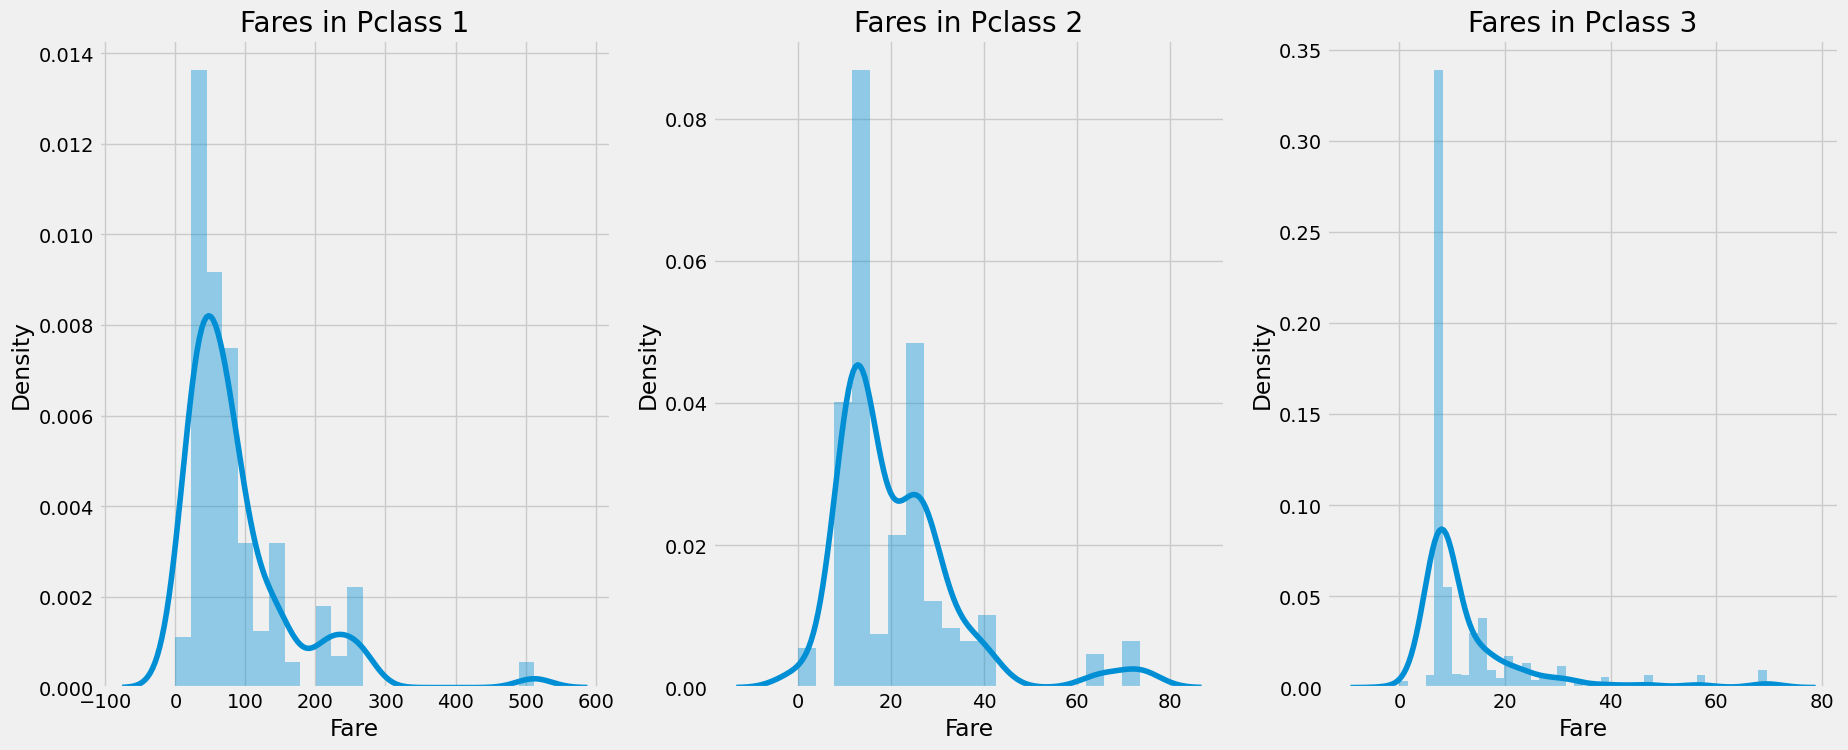

In [99]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

Es sieht so aus, als gäbe es eine große Streuung bei den Fahrpreisen für Fahrgäste in Pclass1, und diese Streuung nimmt weiter ab, wenn die Standards sinken. Da es sich auch hier um eine kontinuierliche Verteilung handelt, können wir sie mit Hilfe von Binning in diskrete Werte umwandeln.

## Kurz gefasste Beobachtungen für alle Merkmale:
**Geschlecht:** Die Überlebenschancen von Frauen sind im Vergleich zu Männern höher.

**Klasse:** Es ist ein deutlicher Trend zu erkennen, dass Passagiere der **ersten Klasse** bessere Überlebenschancen haben. Die Überlebensrate für **Pklasse3 ist sehr niedrig**. Bei **Frauen** ist die Überlebenschance bei **Pklasse 1** fast 1 und bei **Pklasse 2** ebenfalls hoch.   **Geld gewinnt!!!**. 

**Alter:** Kinder unter 5-10 Jahren haben eine hohe Überlebenschance. Passagiere im Alter von 15 bis 35 Jahren starben besonders häufig.

**Embarked:** Dies ist ein sehr interessantes Merkmal. **Die Überlebenschancen in C scheinen besser zu sein als in S, obwohl die meisten Passagiere der P-Klasse 1 in S eingestiegen sind.** Die Passagiere in Q gehörten alle zur **P-Klasse 3**. 

**Parch+SibSp:** Wenn man 1-2 Geschwister, den Ehepartner oder 1-3 Eltern an Bord hat, ist die Wahrscheinlichkeit höher als wenn man allein oder mit einer großen Familie reist.

## **Korrelation zwischen den Merkmalen**

In [100]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


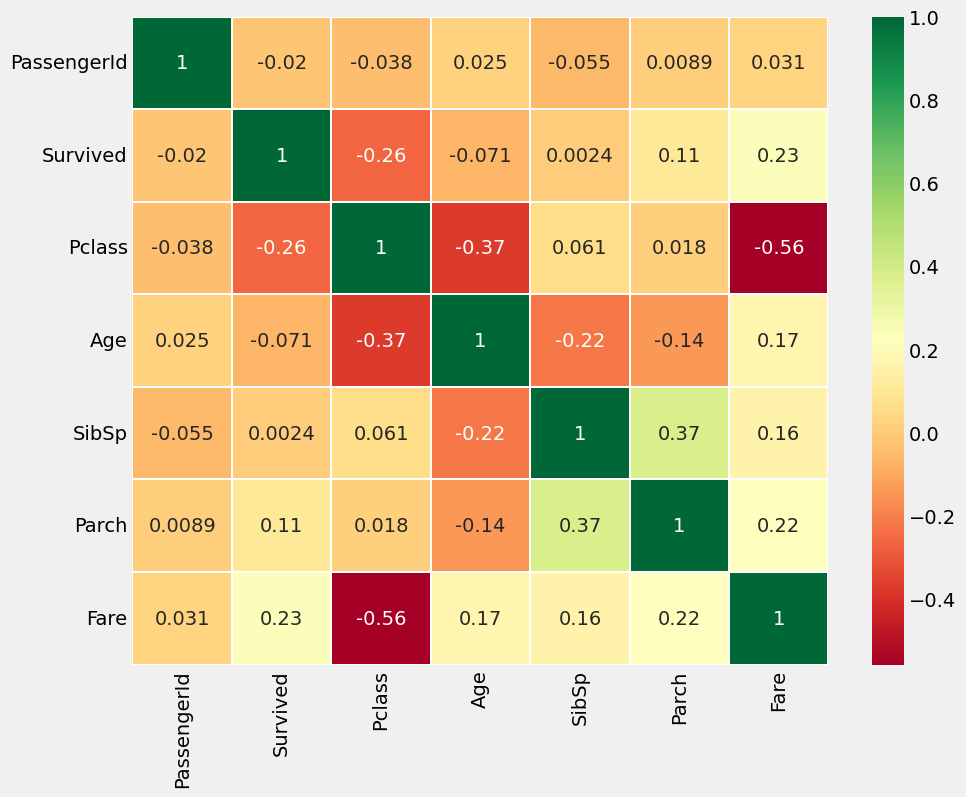

In [101]:
#Korrelations Heatmap für die numerischen Merkmale
sns.heatmap(data.drop(['Name', 'Sex','Ticket','Cabin','Embarked', 'Initial'], axis=1).corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

### Interpretation der Heatmap

Zunächst ist zu beachten, dass nur die numerischen Merkmale verglichen werden, da es offensichtlich ist, dass wir keine Korrelation zwischen Alphabeten oder Zeichenketten herstellen können. Bevor wir das Diagramm verstehen, sollten wir uns ansehen, was genau Korrelation ist.

**POSITIVE KORRELATION:** Wenn eine **Erhöhung von Merkmal A zu einer Erhöhung von Merkmal B führt, dann sind sie positiv korreliert**. Ein Wert **1 bedeutet perfekte positive Korrelation**.

**NEGATIVE KORRELATION:** Wenn eine **Zunahme von Merkmal A zu einer Abnahme von Merkmal B führt, dann sind sie negativ korreliert**. Ein Wert **-1 bedeutet perfekte negative Korrelation**.

Nehmen wir nun an, dass zwei Merkmale hoch oder perfekt korreliert sind, so dass die Zunahme des einen zu einer Zunahme des anderen führt. Dies bedeutet, dass die beiden Merkmale sehr ähnliche Informationen enthalten und die Informationsvarianz sehr gering oder gar nicht vorhanden ist. Dies wird als **Multikolinearität** bezeichnet, da beide Merkmale fast dieselben Informationen enthalten.

Sind Sie also der Meinung, dass wir beide verwenden sollten, da **eines von ihnen redundant ist**. Beim Erstellen oder Trainieren von Modellen sollten wir versuchen, redundante Merkmale zu eliminieren, da dies die Trainingszeit reduziert und viele weitere Vorteile bietet.

Anhand der obigen Heatmap können wir sehen, dass die Merkmale nicht stark korreliert sind. Die höchste Korrelation besteht zwischen **Pclass und Fare, d.h. -0,56**. Wir können also mit allen Merkmalen weitermachen.

## **Teil 2: Feature Engineering und Datenbereinigung**

Was ist nun Feature Engineering?

Wenn wir einen Datensatz mit Merkmalen erhalten, ist es nicht notwendig, dass alle Merkmale wichtig sind. Vielleicht gibt es viele redundante Merkmale, die eliminiert werden sollten. Außerdem können wir durch Beobachtung oder Extraktion von Informationen aus anderen Merkmalen neue Merkmale erhalten oder hinzufügen.

Ein Beispiel dafür wäre das Merkmal "Einleitungen", das aus dem Merkmal "Name" gewonnen wird. Wir werden sehen, ob wir neue Features erhalten und einige eliminieren können. Außerdem werden wir die vorhandenen relevanten Merkmale in eine geeignete Form für die prädiktive Modellierung umwandeln.

## Alter_band

#### Problem mit Altersmerkmal:


Wir müssen diese **kontinuierlichen Werte in kategorische Werte** umwandeln, entweder durch Binning oder Normalisierung. Ich werde das Binning verwenden, d. h. eine Reihe von Altersangaben in einem einzigen Bin gruppieren oder ihnen einen einzigen Wert zuweisen.

Okay, das Höchstalter eines Passagiers war also 80 Jahre. Unterteilen wir also den Bereich von 0-80 in 5 Bins. Also 80/5=16.
Also Fächer der Größe 16.

In [102]:
data['Age_band']=0
data.loc[data['Age']<=16,'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band']=3
data.loc[data['Age']>64,'Age_band']=4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [103]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')#checking the number of passenegers in each band

,count
Age_band,
1,575
2,473
0,142
3,106
4,13


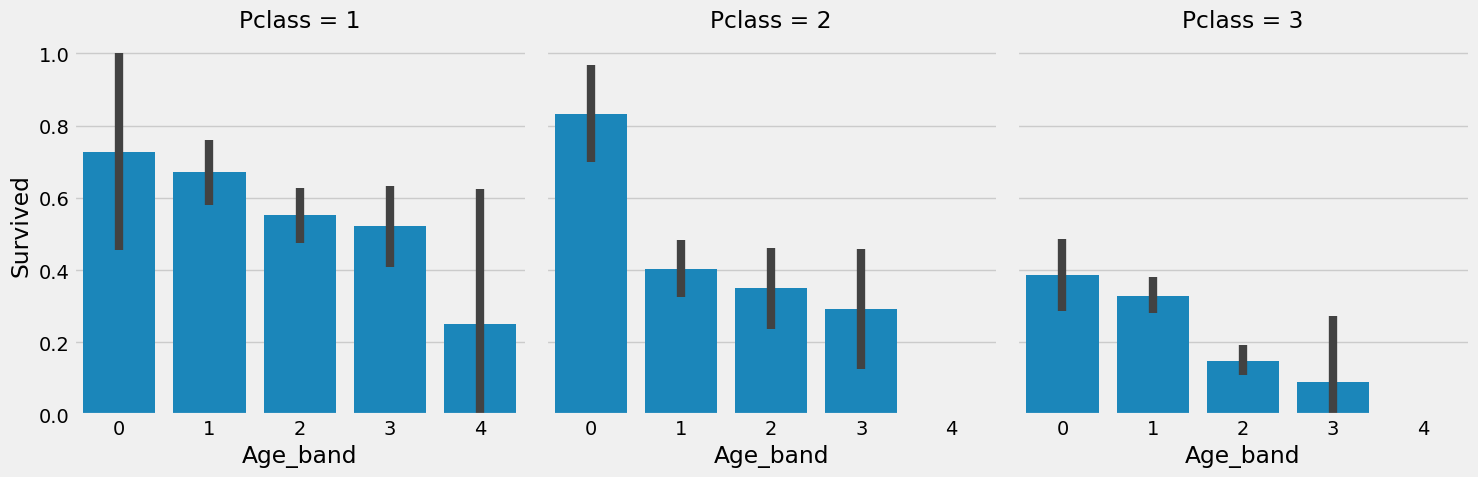

In [104]:
sns.catplot(x='Age_band',y='Survived',kind='bar',data=data,col='Pclass')
plt.show()

Es stimmt, dass die Überlebensrate unabhängig von der P-Klasse mit zunehmendem Alter abnimmt.

## Familiengröße und Alleinstehende
An dieser Stelle können wir ein neues Merkmal namens "Familiengröße" und "Allein" erstellen und es analysieren. Dieses Merkmal ist die Summierung von Parch und SibSp. Es liefert uns kombinierte Daten, so dass wir prüfen können, ob die Überlebensrate etwas mit der Familiengröße der Passagiere zu tun hat. Allein" gibt an, ob ein Passagier allein ist oder nicht.

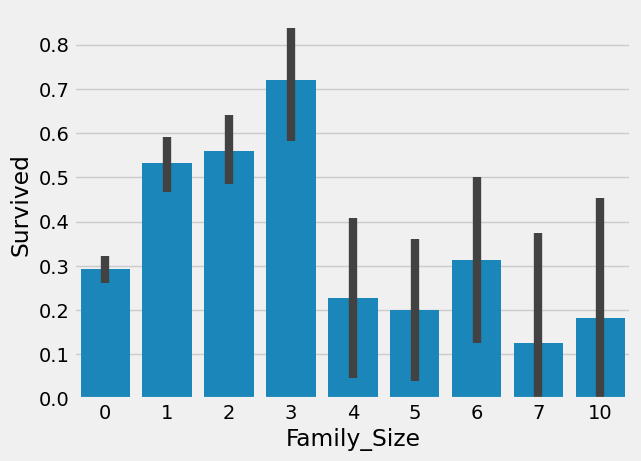

In [105]:
data['Family_Size']=0
data['Family_Size']=data['Parch']+data['SibSp']#family size
data['Alone']=0
data.loc[data.Family_Size==0,'Alone']=1#Alone

sns.barplot(x='Family_Size',y='Survived',data=data)
plt.show()

**Familiengröße=0 bedeutet, dass der Passant allein ist.** Wenn man allein ist oder die Familiengröße=0 ist, sind die Überlebenschancen natürlich sehr gering. Bei einer Familiengröße > 4 sinken die Chancen ebenfalls. Dies scheint auch ein wichtiges Merkmal für das Modell zu sein. Lassen Sie uns dies weiter untersuchen.

In [107]:
data['Fare_Range']=pd.qcut(data['Fare'],4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.896]",0.219585
"(7.896, 14.454]",0.293750
"(14.454, 31.275]",0.432927
"(31.275, 512.329]",0.569659


Wie oben erläutert, können wir deutlich sehen, dass die Überlebenschancen mit steigendem **Fahrpreisbereich** zunehmen.

Jetzt können wir die Fare_Range-Werte nicht mehr unverändert übergeben. Wir sollten sie in Singleton-Werte umwandeln, wie wir es bei **Age_Band** getan haben.

In [108]:
data['Fare_cat']=0
data.loc[data['Fare']<=7.91,'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat']=3

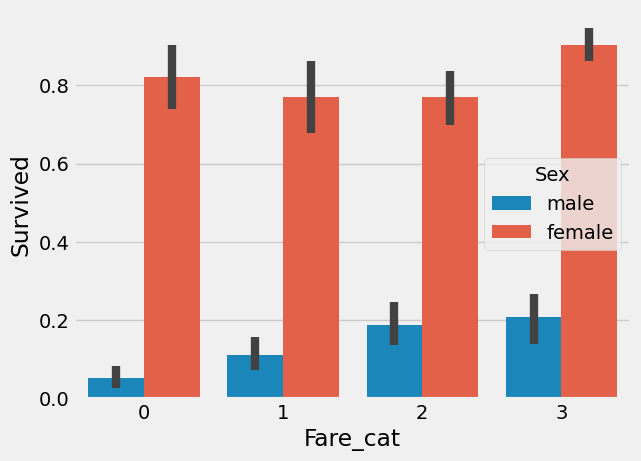

In [109]:
sns.barplot(x='Fare_cat',y='Survived',data=data,hue='Sex')
plt.show()

Es ist klar, dass die Überlebenschancen mit zunehmender Fare_cat steigen. Dieses Merkmal kann bei der Modellierung zusammen mit dem Geschlecht ein wichtiges Merkmal werden.

## Konvertierung von String-Werten in numerische Werte

Da wir keine Zeichenketten an ein Modell für maschinelles Lernen übergeben können, müssen wir Merkmale wie Geschlecht, Einschiffung usw. in numerische Werte umwandeln.

In [110]:
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

In [111]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band,Family_Size,Alone,Fare_Range,Fare_cat
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,1,0,"(-0.001, 7.896]",0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,1,2,1,0,"(31.275, 512.329]",3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,2,1,0,1,"(7.896, 14.454]",1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,1,2,1,0,"(31.275, 512.329]",3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,0,2,0,1,"(7.896, 14.454]",1


### Weglassen nicht benötigter Merkmale

**Name**--> Wir brauchen das Merkmal Name nicht, da es nicht in einen kategorischen Wert umgewandelt werden kann.

**Alter**--> Wir haben das Merkmal "Alter_band", daher brauchen wir dieses nicht.

**Ticket**--> Es handelt sich um eine beliebige Zeichenfolge, die nicht kategorisiert werden kann.

**Fahrpreis**--> Wir haben das Merkmal "Fahrpreis_cat", daher überflüssig.

**Kabine**--> Viele NaN-Werte und viele Passagiere haben mehrere Kabinen. Daher ist diese Funktion nutzlos. Evtl mit übersichtplan der Titanic nützlich (Deck und Nähe zu Notausgängen)

**Fare_Range**--> Wir haben die Funktion fare_cat.

**PassengerId**--> Kann nicht kategorisiert werden.

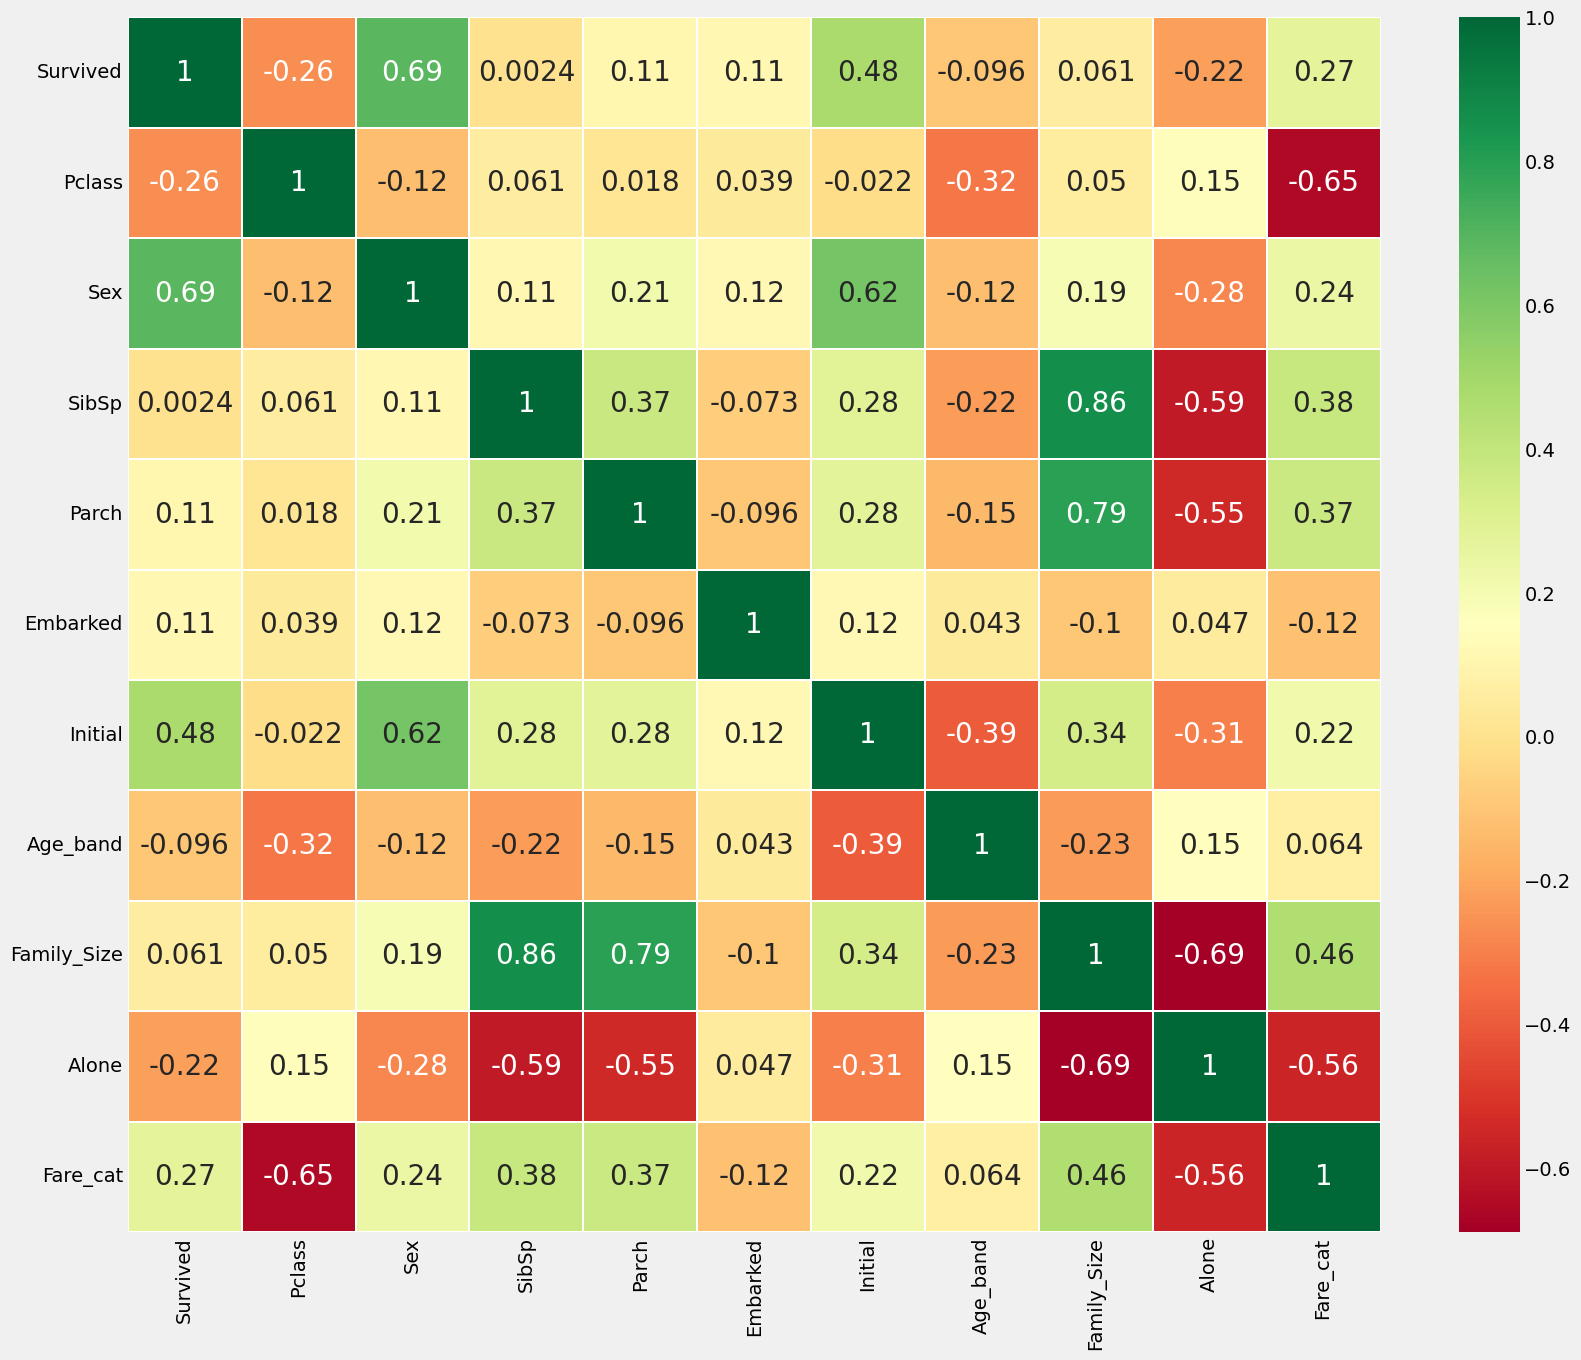

In [112]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Anhand der obigen Korrelationsgrafik können wir einige positiv zusammenhängende Merkmale erkennen. Einige von ihnen sind **SibSp und Family_Size** und **Parch und Family_Size** und einige negative wie **Alone und Family_Size.**

# **Teil3: Prädiktive Modellierung**

Wir haben einige Erkenntnisse aus dem EDA-Teil gewonnen. Aber damit können wir nicht genau vorhersagen, ob ein Passagier überleben oder sterben wird. Daher werden wir nun vorhersagen, ob der Passagier überleben wird oder nicht, indem wir einige großartige Klassifizierungsalgorithmen verwenden:


1) Support-Vector Maschinen (linear und radial)

2) Logistische Regression

3) Entscheidungsbaum

4) Random Forest

In [113]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [114]:
train,test=train_test_split(data,test_size=0.3,random_state=0,stratify=data['Survived'])
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=data[data.columns[1:]]
Y=data['Survived']

### Radial Support Vector Machines(rbf-SVM)

In [115]:
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X,train_Y)
prediction1=model.predict(test_X)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,test_Y))

Accuracy for rbf SVM is  0.8651399491094147


### Linear Support Vector Machine(linear-SVM)

In [116]:
model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(train_X,train_Y)
prediction2=model.predict(test_X)
print('Accuracy for linear SVM is',metrics.accuracy_score(prediction2,test_Y))

Accuracy for linear SVM is 0.8600508905852418


### Logistic Regression

In [117]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Logistic Regression is 0.8549618320610687


### Decision Tree

In [118]:
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))


The accuracy of the Decision Tree is 0.8473282442748091


### Random Forests

In [119]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction7=model.predict(test_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,test_Y))

The accuracy of the Random Forests is 0.8396946564885496


Die Genauigkeit eines Modells ist nicht der einzige Faktor, der die Robustheit des Klassifizierers bestimmt. Nehmen wir an, ein Klassifikator wird anhand von Trainingsdaten trainiert und anhand von Testdaten getestet und erreicht eine Genauigkeit von 90 %.

Dies scheint eine sehr gute Genauigkeit für einen Klassifikator zu sein, aber können wir bestätigen, dass sie auch bei allen neuen Testdatensätzen, die hinzukommen, 90% beträgt? Die Antwort lautet **Nein**, denn wir können nicht feststellen, welche Instanzen der Klassifikator zum Trainieren verwenden wird. Wenn sich die Trainings- und Testdaten ändern, wird sich auch die Genauigkeit ändern. Sie kann zunehmen oder abnehmen. Dies wird als **Modellvarianz** bezeichnet.

Um dies zu überwinden und ein verallgemeinertes Modell zu erhalten, verwenden wir die **Cross Validation**.


# Kreuzvalidierung

Oftmals sind die Daten unausgewogen, d. h. es gibt eine große Anzahl von Instanzen der Klasse 1, aber eine geringe Anzahl von Instanzen anderer Klassen. Daher sollten wir unseren Algorithmus auf jeder einzelnen Instanz des Datensatzes trainieren und testen. Dann können wir einen Durchschnitt aller notierten Genauigkeiten über den Datensatz bilden. 

1) Bei der K-Fold Cross Validation wird der Datensatz zunächst in k-Teilmengen unterteilt.

2) Nehmen wir an, wir teilen den Datensatz in (k=5) Teile auf. Wir reservieren 1 Teil zum Testen und trainieren den Algorithmus über die 4 Teile.

3) Wir setzen den Prozess fort, indem wir den Testteil in jeder Iteration ändern und den Algorithmus mit den anderen Teilen trainieren. Die Genauigkeiten und Fehler werden dann gemittelt, um eine durchschnittliche Genauigkeit des Algorithmus zu erhalten. Dies wird als K-Fold Cross Validation bezeichnet.

4) Es kann vorkommen, dass ein Algorithmus in einem Datensatz für einige Trainingsdaten unterdurchschnittlich abschneidet und für andere Trainingsdaten überdurchschnittlich gut abschneidet. Durch Kreuzvalidierung können wir also ein verallgemeinertes Modell erhalten.



In [120]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','Decision Tree','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(n_estimators=700)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.854962,0.097877
Radial Svm,0.863324,0.057521
Logistic Regression,0.851903,0.086570
Decision Tree,0.827416,0.039844
Random Forest,0.830470,0.042892


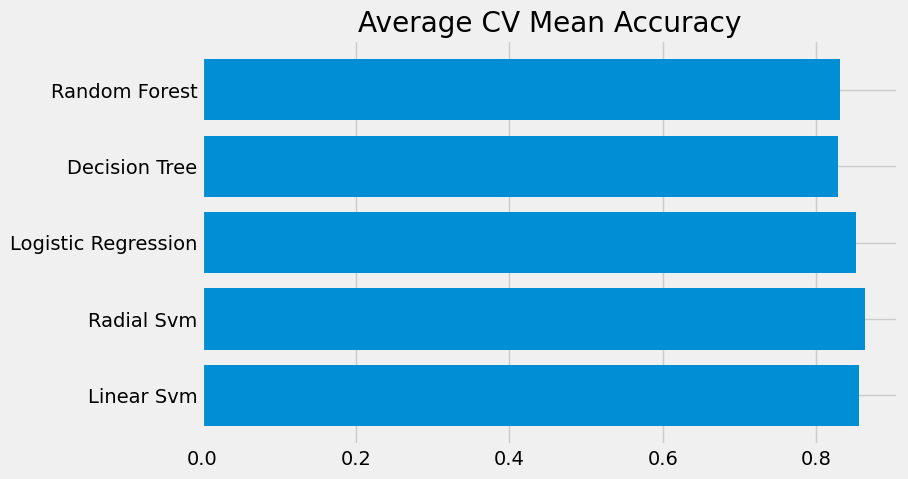

In [122]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

Die Klassifizierungsgenauigkeit kann aufgrund eines Ungleichgewichts (wenn z.B. viel mehr Gestorben sind als Überlebt haben) manchmal irreführend sein. Mit Hilfe der Konfusionsmatrix können wir ein zusammenfassendes Ergebnis erhalten, das zeigt, wo das Modell falsch lag oder welche Klasse das Modell falsch vorhersagte.

## Konfusionsmatrix

Sie gibt die Anzahl der richtigen und falschen Klassifizierungen an, die der Klassifikator vorgenommen hat.

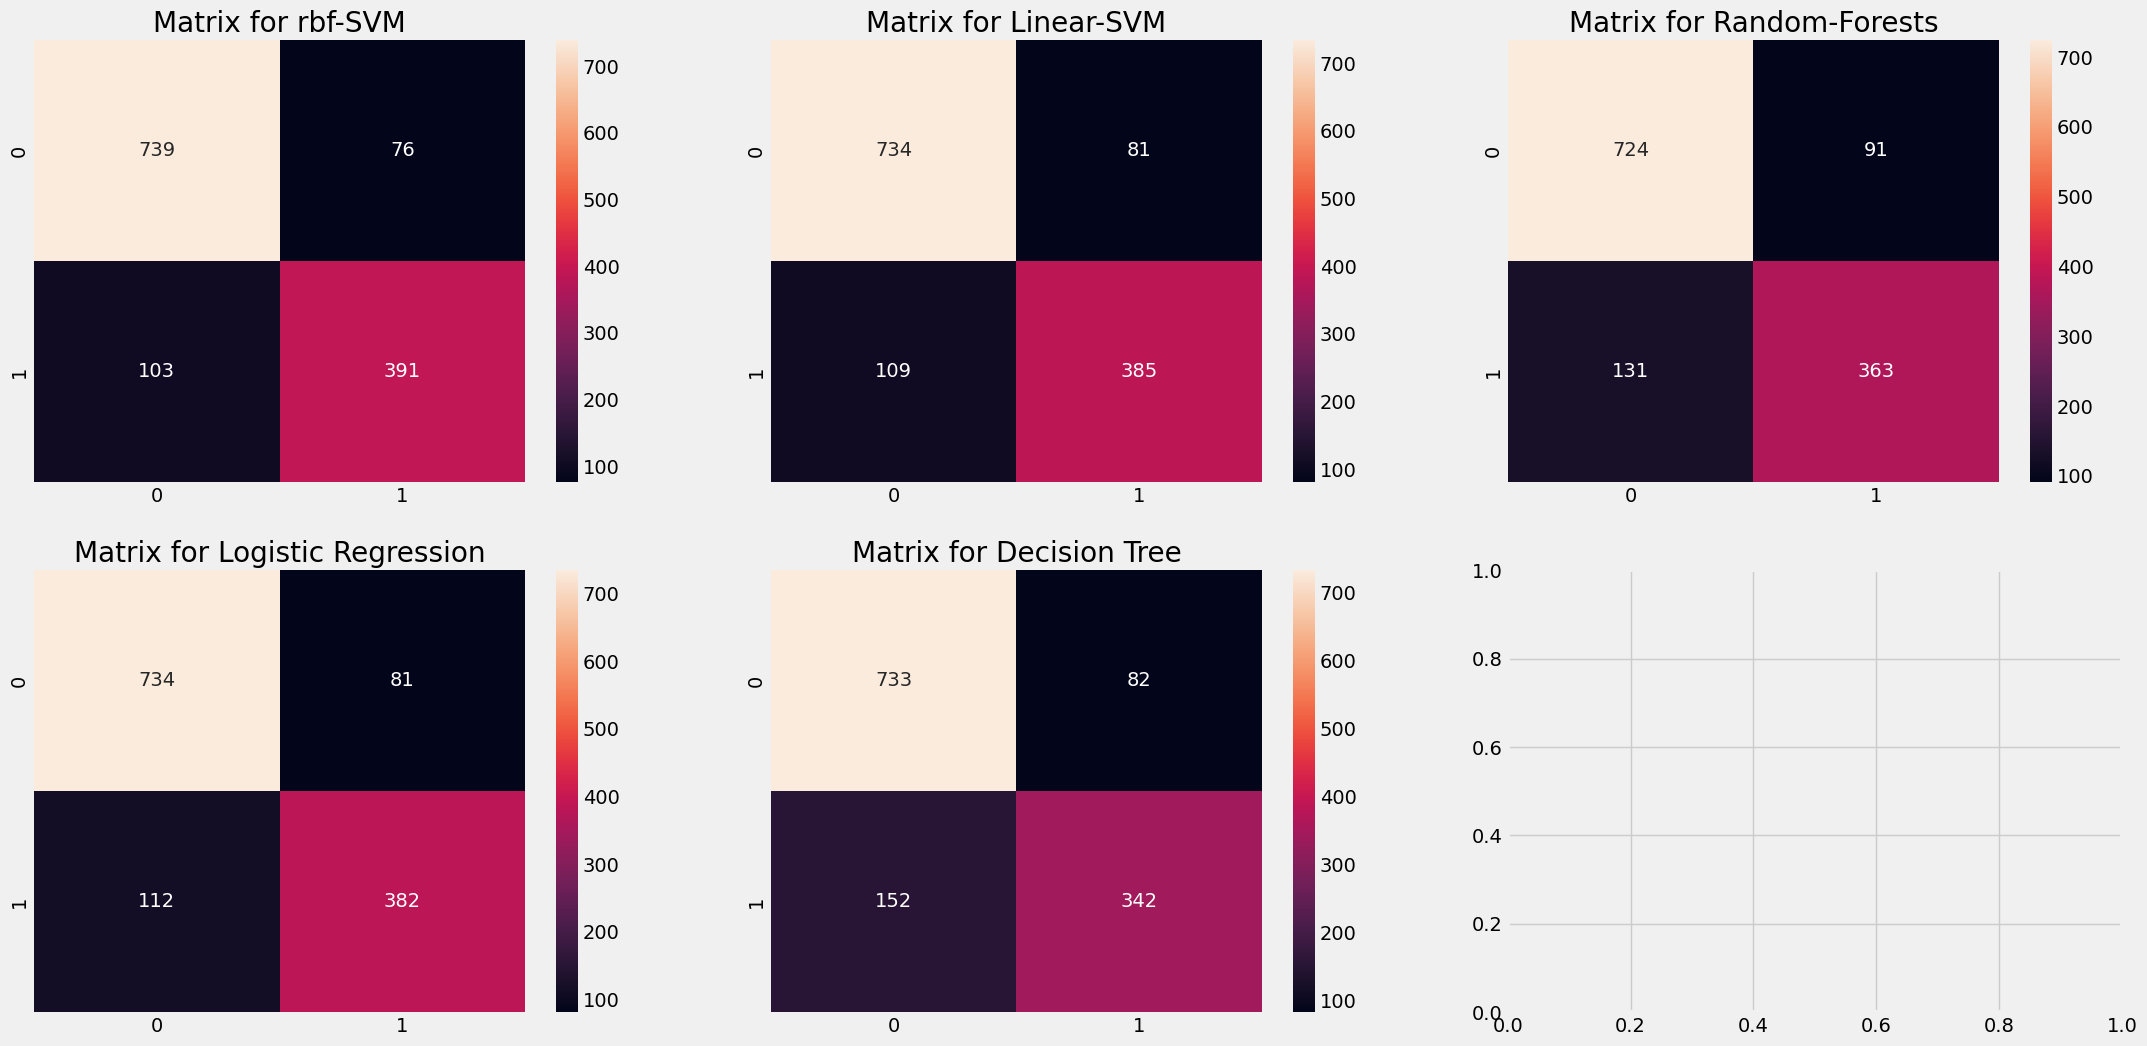

In [123]:
f,ax=plt.subplots(2,3,figsize=(24,12))

y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')

y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')

y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for Random-Forests')

y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Logistic Regression')

y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Decision Tree')

plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

### Interpretation der Konfusionsmatrix

Die linke Diagonale zeigt die Anzahl der richtigen Vorhersagen für jede Klasse, während die rechte Diagonale die Anzahl der falschen Vorhersagen anzeigt. Betrachten wir das erste Diagramm für rbf-SVM:

Wenn wir uns alle Matrizen ansehen, können wir sagen, dass rbf-SVM eine höhere Chance hat, tote Passagiere richtig vorherzusagen, aber NaiveBayes hat eine höhere Chance, überlebende Passagiere richtig vorherzusagen.

**Aufgabe:** Erstellen Sie einen Code, welcher die einzlenen Qualitätsmaße (Sensitivität, Recall, F1-Score etc.) aufführt und vergleiche die Modelle unterinander.

### Hyper-Parameter Abstimmung

Die Modelle des maschinellen Lernens sind wie eine Black-Box. Es gibt einige Standard-Parameterwerte für diese Black-Box, die wir abstimmen oder ändern können, um ein besseres Modell zu erhalten. So wie C und Gamma im SVM-Modell und ähnlich unterschiedliche Parameter für verschiedene Klassifizierer, werden die Hyper-Parameter genannt, die wir einstellen können, um die Lernrate des Algorithmus zu ändern und ein besseres Modell zu erhalten. Dies wird als Hyper-Parameter-Tuning bezeichnet.

Wir werden die Hyper-Parameter für die 2 besten Klassifizierer, d.h. SVM und RandomForests, abstimmen.

#### SVM

In [124]:
from sklearn.model_selection import GridSearchCV
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf','linear']
hyper={'kernel':kernel,'C':C,'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
0.8648445497353106
SVC(C=0.1, gamma=0.3)


#### Random Forests

In [125]:
n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.8296832499780645
RandomForestClassifier(n_estimators=700, random_state=0)


Das beste Ergebnis für Rbf-Svm ist **86,48% mit C=0,1 und Gamma=0,3**.
Für RandomForest liegt das Ergebnis bei **82,96% mit n_estimators=700**.

## Feature Importance

<Axes: >

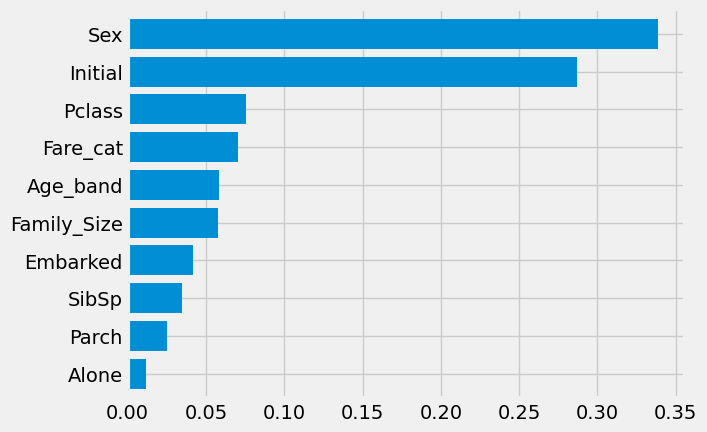

In [126]:
model=RandomForestClassifier(n_estimators=700,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8)


#### Beobachtungen:

1) Einige der allgemein wichtigen Merkmale sind Geschlecht, Initial, Pclass,  Fare_cat. 

2) Wir hatten bereits die positive Korrelation zwischen Sex und Initial gesehen, also beziehen sich beide auf das Geschlecht. D.h. letztendlich war das Geschlecht wohl sehr ausschlaggebend.

3) Ähnlich beziehen sich Pclass und Fare_cat auf den Status der Passagiere und Family_Size auf Alone, Parch und SibSp.

4) Wir könnten mit einer 86%tigen Wahrscheinlichkeit vorhersagen, ob eine Person auf der Titanic überlebt hätte oder nicht. 


**Übungsaufgabe:**

1) Erstelle die ROC-Kurve für die verschiedenen Modelle innerhalb einer Graphik und Interpretiere diese.
2) Erstelle eine Feature Importance Graphik mit einem anderen Classifier zur Auswertung.
3) Skaliere die Merkmale Alter und Ticketpreis und schaue, wie sich das auf die Genauigkeit auswirkt.